In [129]:
import pandas as  pd
import os
import xml.etree.ElementTree as ET
import numpy as np
import matplotlib.pyplot as plt
import glob
import re
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import ttest_ind
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
import sklearn
import seaborn as sns
np.seterr(divide='ignore',invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

## ***PARTIE 1*** ##

In [2]:
dfG = pd.read_csv("Data/GSM3533230_CGND-HRA-00013_counts.txt", sep="\t")
dfG.head()

gene/TE  ../../STAR_v252_mapping/CGND_12616/HRA-00013_PE.bam
0      A1BG                                                 42  
1  A1BG-AS1                                                149  
2      A1CF                                                  0  
3       A2M                                               3327  
4   A2M-AS1                                                101

In [3]:
path = "./Data" # the path of the data

pdList = [] # variable to temporary store all dataframes (one for each txt file)
# For all txt file
for fname in glob.glob(path+"/*.txt"):
    df = pd.read_table(fname) # put the file in a dataframe
    sample_name = re.search("GSM\d+", fname).group() # search the name of the sample in the file name
    df.rename(index= df["gene/TE"], inplace=True) # rename the index (=rows) using the column containing the gene name
    df.drop(columns=df.columns[0], axis=1, inplace=True) # drop the first column containing the gene name, no more need
    df.rename(columns={ df.columns[0]: sample_name }, inplace = True) # rename the column (there is only one column at this step) using the sample name
    pdList.append(df) # add the current dataframe in the list
data_matrix = pd.concat(pdList, 1) # concat all dataframe in 1 dataframe
data_matrix = data_matrix.transpose() # transpose the dataframe to get a more standard shape (samples x variables)

In [4]:
class MyDataFrame:
    
    def __init__(self, folder_path):
        self.__data_matrix = []
    
    def get_data_matrix(self):
        return self.__data_matrix
    
    def set_data_matrix(self,dataFrame):
        self.__data_matrix = dataFrame
        
    def get_describe(self):
        return self.__data_matrix.describe()


    def get_num_sample(self):
        return len(self.__data_matrix)

    def get_num_gene(self):
        return len(self.__data_matrix.columns)

    def get_sample_by_index(self, index):
        return self.__data_matrix.iloc[index]

    def get_gene_by_index(self, index):
        return self.__data_matrix.iloc[:, index]

   
    def get_median(self, is_sample=True):
        median = dict()
        if is_sample:
            for col in self.__data_matrix.columns:
                median[col] = self.__data_matrix.loc[:, col].median()
        else:
            for idx, row in self.__data_matrix.iterrows():
                median[idx] = row.median()
        return median


    
    def get_mean(self, is_sample=True):
        mean = dict()
        if is_sample:
            for col in self.__data_matrix.columns:
                mean[col] = self.__data_matrix.loc[:, col].mean()
        else:
            for idx, row in self.__data_matrix.iterrows():
                mean[idx] = row.mean()
        return mean

    
    def get_std(self, is_sample=True):
        std = dict()
        if is_sample:
            for col in self.__data_matrix.columns:
                std[col] = self.__data_matrix.loc[:, col].std()
        else:
            for idx, row in self.__data_matrix.iterrows():
                std[idx] = row.std()
        return std

   
    def get_min(self, is_sample=True):
        min = dict()
        if is_sample:
            for col in self.__data_matrix.columns:
                min[col] = self.__data_matrix.loc[:, col].min()
        else:
            for idx, row in self.__data_matrix.iterrows():
                min[idx] = row.min()
        return min

    
    def get_max(self, is_sample=True):
        max = dict()
        if is_sample:
            for col in self.__data_matrix.columns:
                max[col] = self.__data_matrix.loc[:, col].max()
        else:
            for idx, row in self.__data_matrix.iterrows():
                max[idx] = row.max()
        return max

    def coef_var(self):
        coef_var = dict()
        for col in self.__data_matrix.columns:
            coef_var[col] = self.__data_matrix.loc[:, col].std()/self.__data_matrix.loc[:, col].mean()
       
        return coef_var

    def get_gene(self,index):
        i = 0
        for col in self.__data_matrix.columns:
            if i == index:
                return col
            i = i+1
        

        
        # prend en entrée un entier et un string( median,max...) et renvoie une liste d'element donc la valeur (median...) est plus grande que l'entier donné en entrée.
    def _index(self,value,string):
        x = []
        if string == "median":
            dic = self.get_median()
        if string == "max":
            dic = self.get_max()
        if string == "min":
            dic = self.get_min()
        if string == "std":
            dic = self.get_std()
        if string == "mean":
            dic = self.get_mean()
        if string=="coef_var":
            dic = self.coef_var()
       
            
        key_list = list(dic.keys())

        for i in range(len(dic)):
            if dic[key_list[i]] >= value :
                x.append(i)
        return x 

    def _indexA(self,value,string):
        x = []
        if string == "median":
            dic = self.get_median()
        if string == "max":
            dic = self.get_max()
        if string == "min":
            dic = self.get_min()
        if string == "std":
            dic = self.get_std()
        if string == "mean":
            dic = self.get_mean()
        if string=="coef_var":
            dic = self.coef_var()
       
            
        key_list = list(dic.keys())

        for i in range(len(dic)):
            if dic[key_list[i]] <= value :
                x.append(i)
        return x 

            
   


    

        
    def plot_all_(self,is_sample = True):
        
        plt.figure(figsize=(12, 10))
        if is_sample:
            t = True
        else :
            t = False
        
        # Plot median
        gene1 = self.get_median(t)
        z1 = gene1.values()
        plt.subplot(3, 2, 1)
        plt.xlabel('Gene')
        plt.ylabel('Median')
        plt.title('Median expression level')
        plt.plot(z1, color='blue')
        
        # Plot mean
        gene2 = self.get_mean(t)
        z2 = gene2.values()
        plt.subplot(3, 2, 2)
        plt.xlabel('Gene')
        plt.ylabel('Mean')
        plt.title('Mean expression level ')
        plt.plot(z2, color='orange')
        
        # Plot standard deviation
        gene3 = self.get_std(t)
        z3 = gene3.values()
        plt.subplot(3, 2, 3)
        plt.xlabel('Gene')
        plt.ylabel('Std')
        plt.title('Standard deviation of expression level')
        plt.plot(z3, color='green')
        
        # Plot minimum
        gene4 = self.get_min(t)
        z4 = gene4.values()
        plt.subplot(3, 2, 4)
        plt.xlabel('Gene')
        plt.ylabel('Min')
        plt.title('Minimum expression level ')
        plt.plot(z4, color='red')
        
        # Plot maximum
        gene5 = self.get_max(t)
        z5 = gene5.values()
        plt.subplot(3, 2, 5)
        plt.xlabel('Gene')
        plt.ylabel('Max')
        plt.title('Maximum expression level ')
        plt.plot(z5, color='purple')

        plt.tight_layout()
        plt.show()

    
        
        
            
        
        
    



In [5]:
dataV1 = MyDataFrame("Data")
dataV1.get_data_matrix()
dataV1.set_data_matrix(data_matrix)
dataV1.get_data_matrix()



A1BG  A1BG-AS1  A1CF   A2M  A2M-AS1  A2ML1  A2MP1  A3GALT2  \
GSM3533382    42       189     0  4052       92    201      1        8   
GSM3533252    37       110     0  4660      102     64      7        1   
GSM3533337    31       110     0  1484       84     60      1        1   
GSM3533314    14        41     0  2185      105    198      4        0   
GSM3533391    37       118     0  1245      104    168      1        1   
...          ...       ...   ...   ...      ...    ...    ...      ...   
GSM3533291    29       142     0  1429      102    115      2        4   
GSM3533349    31       142     0  1526      108    122      2        1   
GSM3533339    39        95     0  1223       74     89      1        3   
GSM3533399    46       179     0  2899       89    109      1        6   
GSM3533403    64       290     0  4752      118    174      8        2   

            A4GALT  A4GNT  ...  X6B_LINE:CR1:LINE  X7A_LINE:CR1:LINE  \
GSM3533382      76      1  ...               1023               2363   
GSM3533252      68      0  ...                880               2077   
GSM3533337      12      0  ...                656               1357   
GSM3533314      24      0  ...                958               2017   
GSM3533391      21      1  ...                847               1822   
...            ...    ...  ...                ...                ...   
GSM3533291      14      1  ...                671               1526   
GSM3533349     139      0  ...                758               1724   
GSM3533339      39      0  ...                687               1424   
GSM3533399      46      1  ...                796               1694   
GSM3533403     135      0  ...                623               1466   

            X7B_LINE:CR1:LINE  X7C_LINE:CR1:LINE  X7D_LINE:CR1:LINE  \
GSM3533382               2137               1265                100   
GSM3533252               1908               1072                119   
GSM3533337               1345                749                 61   
GSM3533314               1817               1087                 99   
GSM3533391               1625                903                 96   
...                       ...                ...                ...   
GSM3533291               1319                735                 85   
GSM3533349               1575                866                 76   
GSM3533339               1340                693                101   
GSM3533399               1488                869                 89   
GSM3533403               1246                726                 61   

            X8_LINE:CR1:LINE  X9_LINE:L1:LINE  Zaphod2:hAT-Tip100:DNA  \
GSM3533382               607              140                     551   
GSM3533252               478              129                     525   
GSM3533337               341              102                     346   
GSM3533314               527              145                     446   
GSM3533391               472              120                     415   
...                      ...              ...                     ...   
GSM3533291               394               92                     330   
GSM3533349               427              122                     430   
GSM3533339               354               83                     300   
GSM3533399               469               99                     442   
GSM3533403               358              107                     347   

            Zaphod3:hAT-Tip100:DNA  Zaphod:hAT-Tip100:DNA  
GSM3533382                    2269                   2233  
GSM3533252                    1821                   1921  
GSM3533337                    1122                   1437  
GSM3533314                    1522                   1757  
GSM3533391                    1556                   1768  
...                            ...                    ...  
GSM3533291                    1279                   1408  
GSM3533349                    1478              

In [6]:
dataV1.get_gene(0)

'A1BG'

No handles with labels found to put in legend.


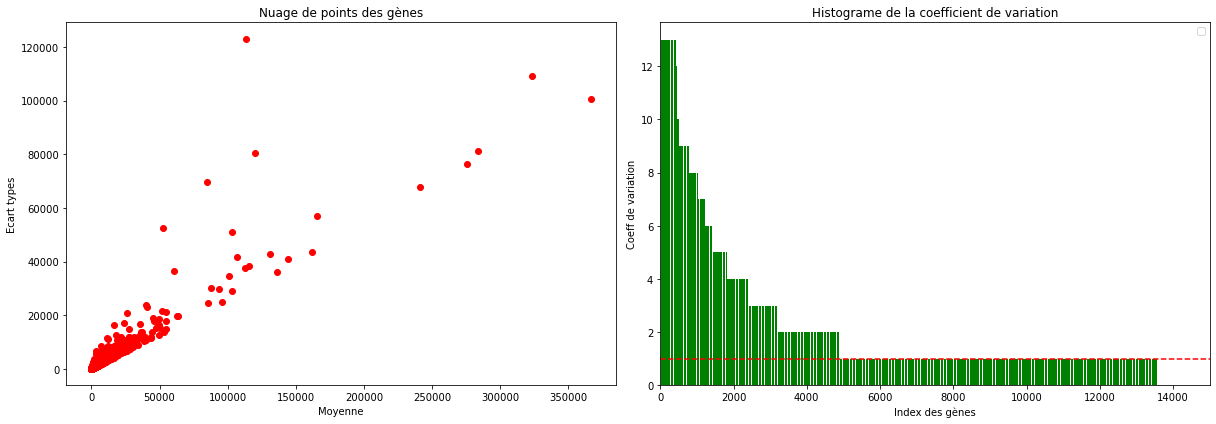

In [7]:
plt.figure(figsize=(17, 6))

# Gene plot
plt.subplot(1, 2, 1)
plt.scatter(x=data_matrix.mean().values, y=data_matrix.std().values, c="red")
plt.title("Nuage de points des gènes")
plt.xlabel("Moyenne")
plt.ylabel("Ecart types")



# CV histogram plot
cv = data_matrix.std() / data_matrix.mean()
cv = cv.round().sort_values(ascending=False)
labels = range(len(cv.keys()))

plt.subplot(1, 2, 2)
plt.bar(x=labels, height=cv.values, color="green")
plt.axhline(y=1, color='red', linestyle='--')
plt.title("Histograme de la coefficient de variation")
plt.xlabel("Index des gènes")
plt.ylabel("Coeff de variation")
plt.xlim(0, 15000)
plt.legend()

plt.tight_layout()
plt.show()

In [8]:
coef_val_dic1 = dataV1._index(30000,"std")
coef_val_dic2 = dataV1._index(85000,"mean")


In [9]:
coef_val_dic = coef_val_dic1.copy()  # Copie la première liste pour ne pas la modifier directement

for item in coef_val_dic2:
    if item not in coef_val_dic:
        coef_val_dic.append(item)

print(coef_val_dic)

[7278, 14073, 14109, 14266, 19593, 21509, 22499, 27963, 27967, 27968, 27970, 27982, 27985, 27987, 28282, 28283, 28284, 28723, 28724, 28725, 28726, 27988, 28183, 28281, 28285]


In [10]:
data2b = dataV1.get_data_matrix()
data2b = data2b.drop(data2b.columns[coef_val_dic],axis=1)
data2b

A1BG  A1BG-AS1  A1CF   A2M  A2M-AS1  A2ML1  A2MP1  A3GALT2  \
GSM3533382    42       189     0  4052       92    201      1        8   
GSM3533252    37       110     0  4660      102     64      7        1   
GSM3533337    31       110     0  1484       84     60      1        1   
GSM3533314    14        41     0  2185      105    198      4        0   
GSM3533391    37       118     0  1245      104    168      1        1   
...          ...       ...   ...   ...      ...    ...    ...      ...   
GSM3533291    29       142     0  1429      102    115      2        4   
GSM3533349    31       142     0  1526      108    122      2        1   
GSM3533339    39        95     0  1223       74     89      1        3   
GSM3533399    46       179     0  2899       89    109      1        6   
GSM3533403    64       290     0  4752      118    174      8        2   

            A4GALT  A4GNT  ...  X6B_LINE:CR1:LINE  X7A_LINE:CR1:LINE  \
GSM3533382      76      1  ...               1023               2363   
GSM3533252      68      0  ...                880               2077   
GSM3533337      12      0  ...                656               1357   
GSM3533314      24      0  ...                958               2017   
GSM3533391      21      1  ...                847               1822   
...            ...    ...  ...                ...                ...   
GSM3533291      14      1  ...                671               1526   
GSM3533349     139      0  ...                758               1724   
GSM3533339      39      0  ...                687               1424   
GSM3533399      46      1  ...                796               1694   
GSM3533403     135      0  ...                623               1466   

            X7B_LINE:CR1:LINE  X7C_LINE:CR1:LINE  X7D_LINE:CR1:LINE  \
GSM3533382               2137               1265                100   
GSM3533252               1908               1072                119   
GSM3533337               1345                749                 61   
GSM3533314               1817               1087                 99   
GSM3533391               1625                903                 96   
...                       ...                ...                ...   
GSM3533291               1319                735                 85   
GSM3533349               1575                866                 76   
GSM3533339               1340                693                101   
GSM3533399               1488                869                 89   
GSM3533403               1246                726                 61   

            X8_LINE:CR1:LINE  X9_LINE:L1:LINE  Zaphod2:hAT-Tip100:DNA  \
GSM3533382               607              140                     551   
GSM3533252               478              129                     525   
GSM3533337               341              102                     346   
GSM3533314               527              145                     446   
GSM3533391               472              120                     415   
...                      ...              ...                     ...   
GSM3533291               394               92                     330   
GSM3533349               427              122                     430   
GSM3533339               354               83                     300   
GSM3533399               469               99                     442   
GSM3533403               358              107                     347   

            Zaphod3:hAT-Tip100:DNA  Zaphod:hAT-Tip100:DNA  
GSM3533382                    2269                   2233  
GSM3533252                    1821                   1921  
GSM3533337                    1122                   1437  
GSM3533314                    1522                   1757  
GSM3533391                    1556                   1768  
...                            ...                    ...  
GSM3533291                    1279                   1408  
GSM3533349                    1478              

In [11]:
dataV2 = MyDataFrame("Data")
dataV2.set_data_matrix(data2b)
dataV2.get_data_matrix()


A1BG  A1BG-AS1  A1CF   A2M  A2M-AS1  A2ML1  A2MP1  A3GALT2  \
GSM3533382    42       189     0  4052       92    201      1        8   
GSM3533252    37       110     0  4660      102     64      7        1   
GSM3533337    31       110     0  1484       84     60      1        1   
GSM3533314    14        41     0  2185      105    198      4        0   
GSM3533391    37       118     0  1245      104    168      1        1   
...          ...       ...   ...   ...      ...    ...    ...      ...   
GSM3533291    29       142     0  1429      102    115      2        4   
GSM3533349    31       142     0  1526      108    122      2        1   
GSM3533339    39        95     0  1223       74     89      1        3   
GSM3533399    46       179     0  2899       89    109      1        6   
GSM3533403    64       290     0  4752      118    174      8        2   

            A4GALT  A4GNT  ...  X6B_LINE:CR1:LINE  X7A_LINE:CR1:LINE  \
GSM3533382      76      1  ...               1023               2363   
GSM3533252      68      0  ...                880               2077   
GSM3533337      12      0  ...                656               1357   
GSM3533314      24      0  ...                958               2017   
GSM3533391      21      1  ...                847               1822   
...            ...    ...  ...                ...                ...   
GSM3533291      14      1  ...                671               1526   
GSM3533349     139      0  ...                758               1724   
GSM3533339      39      0  ...                687               1424   
GSM3533399      46      1  ...                796               1694   
GSM3533403     135      0  ...                623               1466   

            X7B_LINE:CR1:LINE  X7C_LINE:CR1:LINE  X7D_LINE:CR1:LINE  \
GSM3533382               2137               1265                100   
GSM3533252               1908               1072                119   
GSM3533337               1345                749                 61   
GSM3533314               1817               1087                 99   
GSM3533391               1625                903                 96   
...                       ...                ...                ...   
GSM3533291               1319                735                 85   
GSM3533349               1575                866                 76   
GSM3533339               1340                693                101   
GSM3533399               1488                869                 89   
GSM3533403               1246                726                 61   

            X8_LINE:CR1:LINE  X9_LINE:L1:LINE  Zaphod2:hAT-Tip100:DNA  \
GSM3533382               607              140                     551   
GSM3533252               478              129                     525   
GSM3533337               341              102                     346   
GSM3533314               527              145                     446   
GSM3533391               472              120                     415   
...                      ...              ...                     ...   
GSM3533291               394               92                     330   
GSM3533349               427              122                     430   
GSM3533339               354               83                     300   
GSM3533399               469               99                     442   
GSM3533403               358              107                     347   

            Zaphod3:hAT-Tip100:DNA  Zaphod:hAT-Tip100:DNA  
GSM3533382                    2269                   2233  
GSM3533252                    1821                   1921  
GSM3533337                    1122                   1437  
GSM3533314                    1522                   1757  
GSM3533391                    1556                   1768  
...                            ...                    ...  
GSM3533291                    1279                   1408  
GSM3533349                    1478              

In [12]:
dataV2.get_gene(2)

'A1CF'

In [13]:
coef_val_dic

[7278,
 14073,
 14109,
 14266,
 19593,
 21509,
 22499,
 27963,
 27967,
 27968,
 27970,
 27982,
 27985,
 27987,
 28282,
 28283,
 28284,
 28723,
 28724,
 28725,
 28726,
 27988,
 28183,
 28281,
 28285]

On test si le data2 est correct

In [14]:
for i in coef_val_dic:
    if dataV1.get_gene(i) == dataV2.get_gene(i):
        print("!!!!!!!")


No handles with labels found to put in legend.


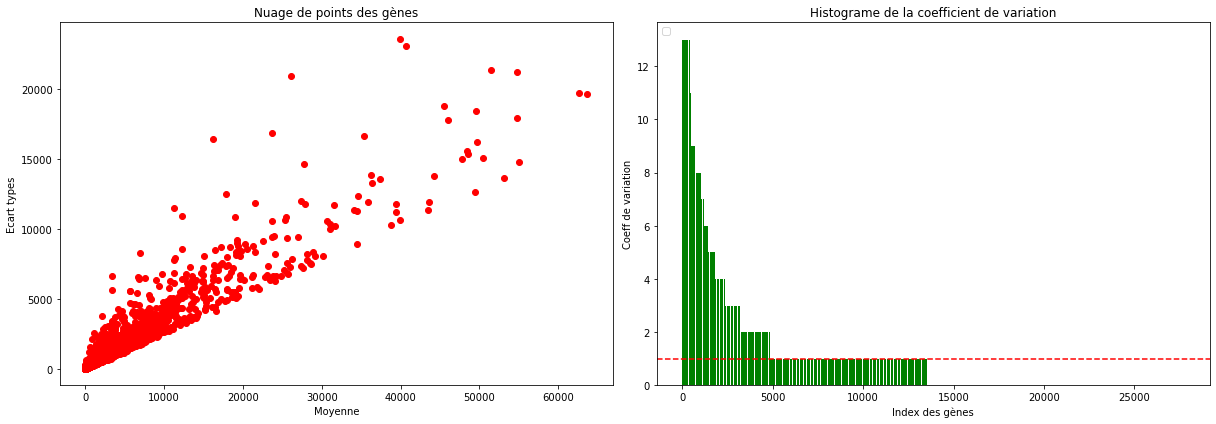

In [15]:
plt.figure(figsize=(17, 6))

# Gene plot
plt.subplot(1, 2, 1)
plt.scatter(x=data2b.mean().values, y=data2b.std().values, c="red")
plt.title("Nuage de points des gènes")
plt.xlabel("Moyenne")
plt.ylabel("Ecart types")


# CV histogram plot
cv = data2b.std() / data2b.mean()
cv = cv.round().sort_values(ascending=False)
labels = range(len(cv.keys()))

plt.subplot(1, 2, 2)
plt.bar(x=labels, height=cv.values, color="green")
plt.axhline(y=1, color='red', linestyle='--')
plt.title("Histograme de la coefficient de variation")
plt.xlabel("Index des gènes")
plt.ylabel("Coeff de variation")
plt.legend()

plt.tight_layout()
plt.show()





on voit qu'on peut encore diminuer (je vais crée un data frame encore je sais pas si c'est utile )

In [16]:
coef_val_dicB1 = dataV2._index(10000,"std")
coef_val_dicB2 = dataV2._index(20000,"mean")

In [17]:
coef_val_dicB = coef_val_dicB1.copy()  # Copie la première liste pour ne pas la modifier directement

for item in coef_val_dicB2:
    if item not in coef_val_dicB:
        coef_val_dicB.append(item)

print(coef_val_dicB)

[225, 752, 1019, 1488, 2543, 2559, 3765, 3838, 5253, 5304, 5374, 5466, 7435, 8246, 8610, 8628, 8740, 9580, 9605, 14106, 14112, 16620, 16964, 17394, 17912, 20571, 21877, 23016, 23792, 23971, 23973, 24439, 26961, 27962, 27965, 27966, 27968, 27971, 27973, 28077, 28188, 28193, 28194, 28206, 28216, 28249, 28250, 28251, 28253, 28256, 28610, 28857, 1005, 6063, 7147, 8611, 9581, 9607, 13990, 17686, 21653, 21654, 24411, 25418, 27548, 27959, 27961, 28165, 28174, 28182, 28185, 28189, 28190, 28192, 28195, 28201, 28207, 28220, 28223, 28226, 28239, 28246, 28248, 28252, 28266, 28516, 28605, 28609, 28611, 28706, 28713, 28715, 28842]


In [18]:
data3b = dataV2.get_data_matrix()
data3b = data3b.drop(data3b.columns[coef_val_dicB],axis=1)
data3b

A1BG  A1BG-AS1  A1CF   A2M  A2M-AS1  A2ML1  A2MP1  A3GALT2  \
GSM3533382    42       189     0  4052       92    201      1        8   
GSM3533252    37       110     0  4660      102     64      7        1   
GSM3533337    31       110     0  1484       84     60      1        1   
GSM3533314    14        41     0  2185      105    198      4        0   
GSM3533391    37       118     0  1245      104    168      1        1   
...          ...       ...   ...   ...      ...    ...    ...      ...   
GSM3533291    29       142     0  1429      102    115      2        4   
GSM3533349    31       142     0  1526      108    122      2        1   
GSM3533339    39        95     0  1223       74     89      1        3   
GSM3533399    46       179     0  2899       89    109      1        6   
GSM3533403    64       290     0  4752      118    174      8        2   

            A4GALT  A4GNT  ...  X6B_LINE:CR1:LINE  X7A_LINE:CR1:LINE  \
GSM3533382      76      1  ...               1023               2363   
GSM3533252      68      0  ...                880               2077   
GSM3533337      12      0  ...                656               1357   
GSM3533314      24      0  ...                958               2017   
GSM3533391      21      1  ...                847               1822   
...            ...    ...  ...                ...                ...   
GSM3533291      14      1  ...                671               1526   
GSM3533349     139      0  ...                758               1724   
GSM3533339      39      0  ...                687               1424   
GSM3533399      46      1  ...                796               1694   
GSM3533403     135      0  ...                623               1466   

            X7B_LINE:CR1:LINE  X7C_LINE:CR1:LINE  X7D_LINE:CR1:LINE  \
GSM3533382               2137               1265                100   
GSM3533252               1908               1072                119   
GSM3533337               1345                749                 61   
GSM3533314               1817               1087                 99   
GSM3533391               1625                903                 96   
...                       ...                ...                ...   
GSM3533291               1319                735                 85   
GSM3533349               1575                866                 76   
GSM3533339               1340                693                101   
GSM3533399               1488                869                 89   
GSM3533403               1246                726                 61   

            X8_LINE:CR1:LINE  X9_LINE:L1:LINE  Zaphod2:hAT-Tip100:DNA  \
GSM3533382               607              140                     551   
GSM3533252               478              129                     525   
GSM3533337               341              102                     346   
GSM3533314               527              145                     446   
GSM3533391               472              120                     415   
...                      ...              ...                     ...   
GSM3533291               394               92                     330   
GSM3533349               427              122                     430   
GSM3533339               354               83                     300   
GSM3533399               469               99                     442   
GSM3533403               358              107                     347   

            Zaphod3:hAT-Tip100:DNA  Zaphod:hAT-Tip100:DNA  
GSM3533382                    2269                   2233  
GSM3533252                    1821                   1921  
GSM3533337                    1122                   1437  
GSM3533314                    1522                   1757  
GSM3533391                    1556                   1768  
...                            ...                    ...  
GSM3533291                    1279                   1408  
GSM3533349                    1478              

In [19]:
dataV3 = MyDataFrame("Data")
dataV3.set_data_matrix(data3b)
dataV3.get_data_matrix()


A1BG  A1BG-AS1  A1CF   A2M  A2M-AS1  A2ML1  A2MP1  A3GALT2  \
GSM3533382    42       189     0  4052       92    201      1        8   
GSM3533252    37       110     0  4660      102     64      7        1   
GSM3533337    31       110     0  1484       84     60      1        1   
GSM3533314    14        41     0  2185      105    198      4        0   
GSM3533391    37       118     0  1245      104    168      1        1   
...          ...       ...   ...   ...      ...    ...    ...      ...   
GSM3533291    29       142     0  1429      102    115      2        4   
GSM3533349    31       142     0  1526      108    122      2        1   
GSM3533339    39        95     0  1223       74     89      1        3   
GSM3533399    46       179     0  2899       89    109      1        6   
GSM3533403    64       290     0  4752      118    174      8        2   

            A4GALT  A4GNT  ...  X6B_LINE:CR1:LINE  X7A_LINE:CR1:LINE  \
GSM3533382      76      1  ...               1023               2363   
GSM3533252      68      0  ...                880               2077   
GSM3533337      12      0  ...                656               1357   
GSM3533314      24      0  ...                958               2017   
GSM3533391      21      1  ...                847               1822   
...            ...    ...  ...                ...                ...   
GSM3533291      14      1  ...                671               1526   
GSM3533349     139      0  ...                758               1724   
GSM3533339      39      0  ...                687               1424   
GSM3533399      46      1  ...                796               1694   
GSM3533403     135      0  ...                623               1466   

            X7B_LINE:CR1:LINE  X7C_LINE:CR1:LINE  X7D_LINE:CR1:LINE  \
GSM3533382               2137               1265                100   
GSM3533252               1908               1072                119   
GSM3533337               1345                749                 61   
GSM3533314               1817               1087                 99   
GSM3533391               1625                903                 96   
...                       ...                ...                ...   
GSM3533291               1319                735                 85   
GSM3533349               1575                866                 76   
GSM3533339               1340                693                101   
GSM3533399               1488                869                 89   
GSM3533403               1246                726                 61   

            X8_LINE:CR1:LINE  X9_LINE:L1:LINE  Zaphod2:hAT-Tip100:DNA  \
GSM3533382               607              140                     551   
GSM3533252               478              129                     525   
GSM3533337               341              102                     346   
GSM3533314               527              145                     446   
GSM3533391               472              120                     415   
...                      ...              ...                     ...   
GSM3533291               394               92                     330   
GSM3533349               427              122                     430   
GSM3533339               354               83                     300   
GSM3533399               469               99                     442   
GSM3533403               358              107                     347   

            Zaphod3:hAT-Tip100:DNA  Zaphod:hAT-Tip100:DNA  
GSM3533382                    2269                   2233  
GSM3533252                    1821                   1921  
GSM3533337                    1122                   1437  
GSM3533314                    1522                   1757  
GSM3533391                    1556                   1768  
...                            ...                    ...  
GSM3533291                    1279                   1408  
GSM3533349                    1478              

In [20]:
for i in coef_val_dicB:
    if dataV2.get_gene(i) == dataV3.get_gene(i):
        print("!!!!!!!")


No handles with labels found to put in legend.


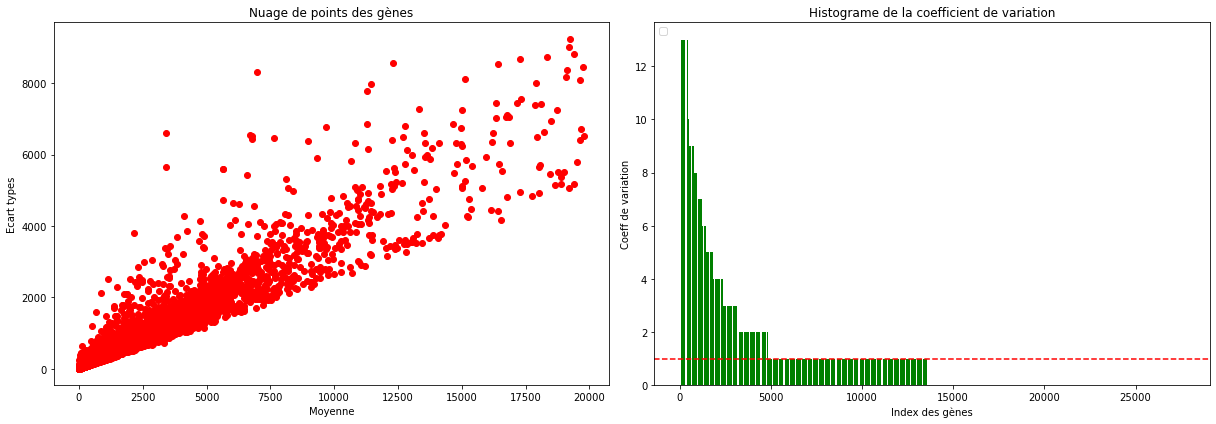

In [21]:
plt.figure(figsize=(17, 6))

# Gene plot
plt.subplot(1, 2, 1)
plt.scatter(x=data3b.mean().values, y=data3b.std().values, c="red")
plt.title("Nuage de points des gènes")
plt.xlabel("Moyenne")
plt.ylabel("Ecart types")


# CV histogram plot
cv = data3b.std() / data3b.mean()
cv = cv.round().sort_values(ascending=False)
labels = range(len(cv.keys()))

plt.subplot(1, 2, 2)
plt.bar(x=labels, height=cv.values, color="green")
plt.axhline(y=1, color='red', linestyle='--')
plt.title("Histograme de la coefficient de variation")
plt.xlabel("Index des gènes")
plt.ylabel("Coeff de variation")
plt.legend()

plt.tight_layout()
plt.show()

In [22]:
coef_val_dicC1 = dataV3._index(4000,"std")
coef_val_dicC2 = dataV3._index(10000,"mean")
coef_val_dicC = coef_val_dicC1.copy()  # Copie la première liste pour ne pas la modifier directement

for item in coef_val_dicC2:
    if item not in coef_val_dicC:
        coef_val_dicC.append(item)
data4b = dataV3.get_data_matrix()
data4b = data4b.drop(data4b.columns[coef_val_dicC],axis=1)
dataV4 = MyDataFrame("Data")
dataV4.set_data_matrix(data4b)


In [23]:
dataV4.get_data_matrix()


A1BG  A1BG-AS1  A1CF   A2M  A2M-AS1  A2ML1  A2MP1  A3GALT2  \
GSM3533382    42       189     0  4052       92    201      1        8   
GSM3533252    37       110     0  4660      102     64      7        1   
GSM3533337    31       110     0  1484       84     60      1        1   
GSM3533314    14        41     0  2185      105    198      4        0   
GSM3533391    37       118     0  1245      104    168      1        1   
...          ...       ...   ...   ...      ...    ...    ...      ...   
GSM3533291    29       142     0  1429      102    115      2        4   
GSM3533349    31       142     0  1526      108    122      2        1   
GSM3533339    39        95     0  1223       74     89      1        3   
GSM3533399    46       179     0  2899       89    109      1        6   
GSM3533403    64       290     0  4752      118    174      8        2   

            A4GALT  A4GNT  ...  X6B_LINE:CR1:LINE  X7A_LINE:CR1:LINE  \
GSM3533382      76      1  ...               1023               2363   
GSM3533252      68      0  ...                880               2077   
GSM3533337      12      0  ...                656               1357   
GSM3533314      24      0  ...                958               2017   
GSM3533391      21      1  ...                847               1822   
...            ...    ...  ...                ...                ...   
GSM3533291      14      1  ...                671               1526   
GSM3533349     139      0  ...                758               1724   
GSM3533339      39      0  ...                687               1424   
GSM3533399      46      1  ...                796               1694   
GSM3533403     135      0  ...                623               1466   

            X7B_LINE:CR1:LINE  X7C_LINE:CR1:LINE  X7D_LINE:CR1:LINE  \
GSM3533382               2137               1265                100   
GSM3533252               1908               1072                119   
GSM3533337               1345                749                 61   
GSM3533314               1817               1087                 99   
GSM3533391               1625                903                 96   
...                       ...                ...                ...   
GSM3533291               1319                735                 85   
GSM3533349               1575                866                 76   
GSM3533339               1340                693                101   
GSM3533399               1488                869                 89   
GSM3533403               1246                726                 61   

            X8_LINE:CR1:LINE  X9_LINE:L1:LINE  Zaphod2:hAT-Tip100:DNA  \
GSM3533382               607              140                     551   
GSM3533252               478              129                     525   
GSM3533337               341              102                     346   
GSM3533314               527              145                     446   
GSM3533391               472              120                     415   
...                      ...              ...                     ...   
GSM3533291               394               92                     330   
GSM3533349               427              122                     430   
GSM3533339               354               83                     300   
GSM3533399               469               99                     442   
GSM3533403               358              107                     347   

            Zaphod3:hAT-Tip100:DNA  Zaphod:hAT-Tip100:DNA  
GSM3533382                    2269                   2233  
GSM3533252                    1821                   1921  
GSM3533337                    1122                   1437  
GSM3533314                    1522                   1757  
GSM3533391                    1556                   1768  
...                            ...                    ...  
GSM3533291                    1279                   1408  
GSM3533349                    1478              

No handles with labels found to put in legend.


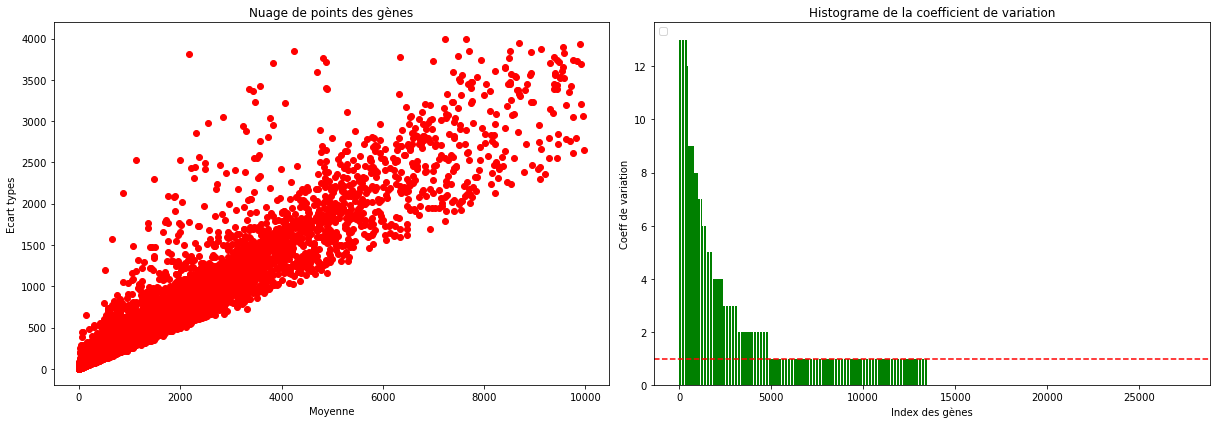

In [24]:
plt.figure(figsize=(17, 6))

# Gene plot
plt.subplot(1, 2, 1)
plt.scatter(x=data4b.mean().values, y=data4b.std().values, c="red")
plt.title("Nuage de points des gènes")
plt.xlabel("Moyenne")
plt.ylabel("Ecart types")


# CV histogram plot
cv = data4b.std() / data4b.mean()
cv = cv.round().sort_values(ascending=False)
labels = range(len(cv.keys()))

plt.subplot(1, 2, 2)
plt.bar(x=labels, height=cv.values, color="green")
plt.axhline(y=1, color='red', linestyle='--')
plt.title("Histograme de la coefficient de variation")
plt.xlabel("Index des gènes")
plt.ylabel("Coeff de variation")
plt.legend()

plt.tight_layout()
plt.show()

On voit qu'il n'y a pas beaucoup de genes de difference, on va crée un dernier dataframe qui reunit la ùajorité des genes du dataV4 et on ne regardera que la V1 et la V5

In [25]:
coef_val_dicD1 = dataV4._index(1500,"std")
coef_val_dicD2 = dataV4._index(4000,"mean")
coef_val_dicD = coef_val_dicD1.copy()  # Copie la première liste pour ne pas la modifier directement

for item in coef_val_dicD2:
    if item not in coef_val_dicD:
        coef_val_dicD.append(item)
data5b = dataV4.get_data_matrix()
data5b = data5b.drop(data5b.columns[coef_val_dicD],axis=1)
dataV5 = MyDataFrame("Data")
dataV5.set_data_matrix(data5b)

No handles with labels found to put in legend.


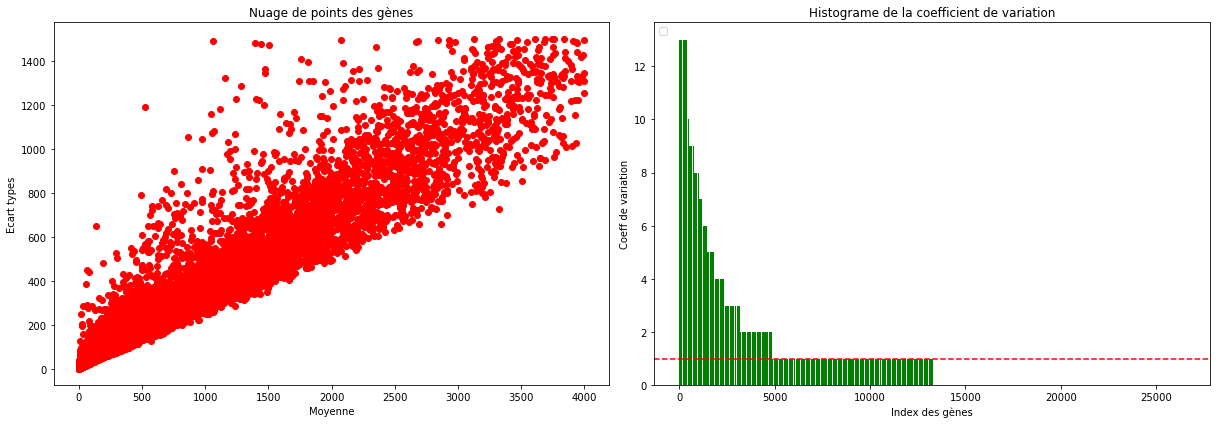

In [26]:
plt.figure(figsize=(17, 6))

# Gene plot
plt.subplot(1, 2, 1)
plt.scatter(x=data5b.mean().values, y=data5b.std().values, c="red")
plt.title("Nuage de points des gènes")
plt.xlabel("Moyenne")
plt.ylabel("Ecart types")


# CV histogram plot
cv = data5b.std() / data5b.mean()
cv = cv.round().sort_values(ascending=False)
labels = range(len(cv.keys()))

plt.subplot(1, 2, 2)
plt.bar(x=labels, height=cv.values, color="green")
plt.axhline(y=1, color='red', linestyle='--')
plt.title("Histograme de la coefficient de variation")
plt.xlabel("Index des gènes")
plt.ylabel("Coeff de variation")
plt.legend()

plt.tight_layout()
plt.show()

In [27]:
print(dataV1.get_num_gene())
print(dataV2.get_num_gene())
print(dataV3.get_num_gene())
print(dataV4.get_num_gene())
print(dataV5.get_num_gene())

28953
28928
28835
28600
27633


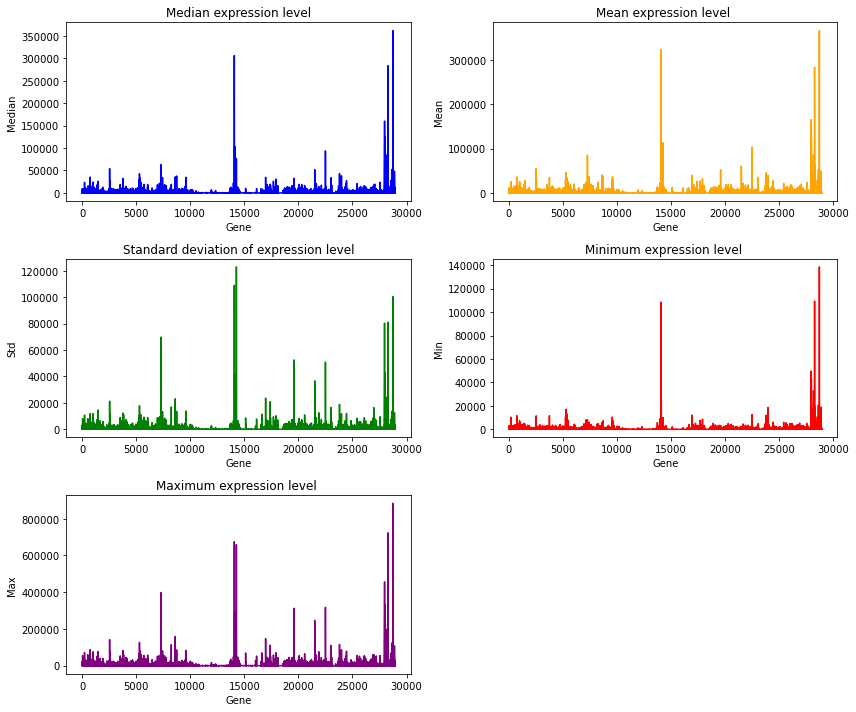

In [28]:
dataV1.plot_all_()

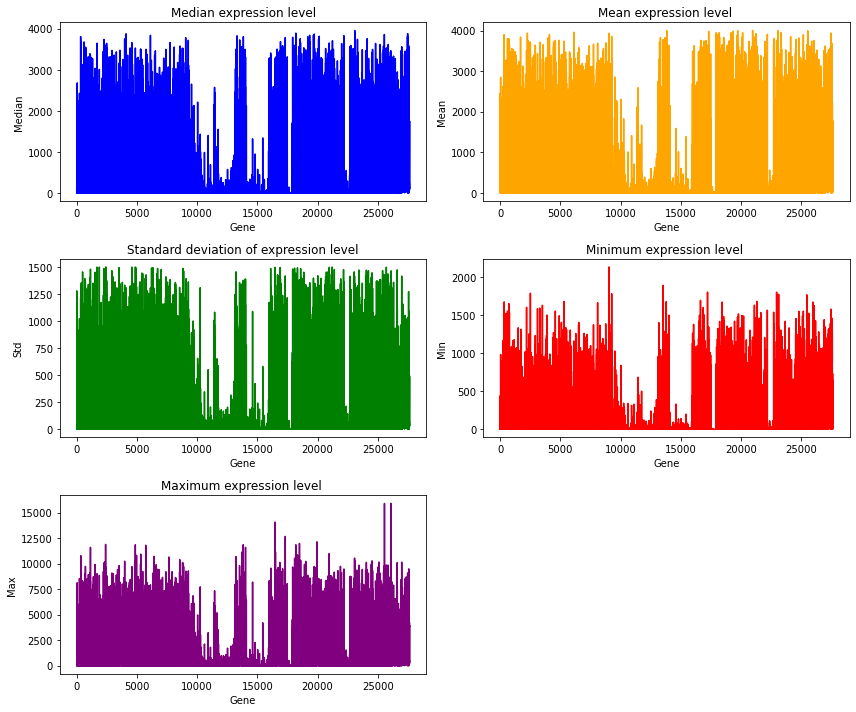

In [29]:
dataV5.plot_all_()

Test

In [30]:
dataV1.get_median()['A1BG'] == data_matrix['A1BG'].median()
dataV1.get_mean()['A2ML1'] == data_matrix['A2ML1'].mean()
dataV1.get_std()['A1BG'] == data_matrix['A1BG'].std()
dataV1.get_max()['A2ML1'] == data_matrix['A2ML1'].max()
dataV1.get_min()['A1BG'] == data_matrix['A1BG'].min()

True

In [31]:
# LECTURE FICHIER XML
url = '{http://www.ncbi.nlm.nih.gov/geo/info/MINiML}'
tree = ET.parse('Data/GSE124439_family.xml')
root = tree.getroot()
#samples = root.findall(url+"Sample")
#print(samples)

data_list = []

# Loop to loop through samples and extract other annotations
for sample in root.findall(url+'Sample'): 
    #Sample ID retrieval
    #print(sample)
    sample_id = sample.get('iid')
    
    # Recovery of annotations
    annotations = {}
    for i in sample.findall(url+'Channel'):
        #print(i)
        for charac in i.findall(url+'Characteristics'):
            if charac.get('tag') in ['cns subregion', 'subject id', 'sample group']:
                annotations[charac.get('tag')] = charac.text.strip()    
    # Add data to list
    data = {'sample_id': sample_id, **annotations}
    data_list.append(data)
#print(ET.tostring(root, encoding='unicode'))    
# Creating the DataFrame from the data

df = pd.DataFrame(data_list)  
df

sample_id   cns subregion   subject id      sample group
0    GSM3533230  Frontal Cortex  NEUEL133AK6  ALS Spectrum MND
1    GSM3533231  Frontal Cortex  NEUYV496XLP  ALS Spectrum MND
2    GSM3533232  Frontal Cortex  NEUZU200WEQ  ALS Spectrum MND
3    GSM3533233  Frontal Cortex  NEUME287RK2  ALS Spectrum MND
4    GSM3533234  Frontal Cortex  NEUEC006FND  ALS Spectrum MND
..          ...             ...          ...               ...
171  GSM3533401  Frontal Cortex  NEUMY028JH4  ALS Spectrum MND
172  GSM3533402  Frontal Cortex  NEUXR145UBL  ALS Spectrum MND
173  GSM3533403  Frontal Cortex  NEUKN209FNW  ALS Spectrum MND
174  GSM3533404  Frontal Cortex  NEUUF289NRL  ALS Spectrum MND
175  GSM3533405  Frontal Cortex  NEUPU334DL1  ALS Spectrum MND

[176 rows x 4 columns]

In [32]:
class MyDataFrame2:
    
    def __init__(self, folder_path):
        self.__data_matrix = []
    
    def get_data_matrix(self):
        return self.__data_matrix
    
    def set_data_matrix(self,dataFrame):
        self.__data_matrix = dataFrame
    
    def is_positive(self,index):
        if "ALS" in self.get_data_matrix().loc[index, "sample group"]:
            return 1
        if "Other" in self.get_data_matrix().loc[index,"sample group"]:
            return 2
        else:
            return 0

        
    def is_positive2(self,index):
        if "sALS" in self.get_data_matrix().loc[index, "diagnosis"]:
            return 1
        else:
            return 0

    def cns_sub(self,index):
        if "Frontal Cortex" in self.get_data_matrix().loc[index,"cns subregion"]:
            return 1
        if "Motor Cortex" in self.get_data_matrix().loc[index,"cns subregion"]:
            return 0
        
        

In [33]:
dataZ = MyDataFrame2("Data1")
dataZ.get_data_matrix()
dataZ.set_data_matrix(df)
dataZ.get_data_matrix()

sample_id   cns subregion   subject id      sample group
0    GSM3533230  Frontal Cortex  NEUEL133AK6  ALS Spectrum MND
1    GSM3533231  Frontal Cortex  NEUYV496XLP  ALS Spectrum MND
2    GSM3533232  Frontal Cortex  NEUZU200WEQ  ALS Spectrum MND
3    GSM3533233  Frontal Cortex  NEUME287RK2  ALS Spectrum MND
4    GSM3533234  Frontal Cortex  NEUEC006FND  ALS Spectrum MND
..          ...             ...          ...               ...
171  GSM3533401  Frontal Cortex  NEUMY028JH4  ALS Spectrum MND
172  GSM3533402  Frontal Cortex  NEUXR145UBL  ALS Spectrum MND
173  GSM3533403  Frontal Cortex  NEUKN209FNW  ALS Spectrum MND
174  GSM3533404  Frontal Cortex  NEUUF289NRL  ALS Spectrum MND
175  GSM3533405  Frontal Cortex  NEUPU334DL1  ALS Spectrum MND

[176 rows x 4 columns]

Test

In [34]:
dataZ.is_positive(150) == 0
dataZ.is_positive(1) == 1

True

On va crée quatre dataFrame
    - data1 avec la region frontal cortex
    - data 1 avec l'autre region
    - data2 avec la region frontal cortex
    - data2 avec l'autre region

In [35]:
l = []
ll = []
for i in range(175):
    if dataZ.cns_sub(i) == 1:
        l.append(dataV1.get_data_matrix().index[i])
    else :
        ll.append(dataV1.get_data_matrix().index[i])


In [36]:
data3 = dataV1.get_data_matrix().drop(index = l)
data4 = dataV1.get_data_matrix().drop(index = ll)
data5 = dataV5.get_data_matrix().drop(index = l)
data6 = dataV5.get_data_matrix().drop(index = ll)

In [37]:
dataV6 = MyDataFrame("Data")
dataV6.set_data_matrix(data3)
dataV7 = MyDataFrame("Data")
dataV7.set_data_matrix(data4)
dataV8 = MyDataFrame("Data")
dataV8.set_data_matrix(data5)
dataV9 = MyDataFrame("Data")
dataV9.set_data_matrix(data6)

pca

In [38]:
# on crée une instance de l'objet StandardScaler pour centrer et réduire les données
scaler = StandardScaler()
# on transforme les données originales en données centrées et réduites
X_scaled = scaler.fit_transform(dataV8.get_data_matrix())

# on crée une instance de l'objet PCA en spécifiant le nombre de composantes principales souhaité
pca = PCA(n_components=96)
# on applique l'analyse en composantes principales aux données centrées et réduites
X_pca = pca.fit_transform(X_scaled)

variance_cumulee = sum(pca.explained_variance_ratio_)*100
print(variance_cumulee)


99.99999999999999


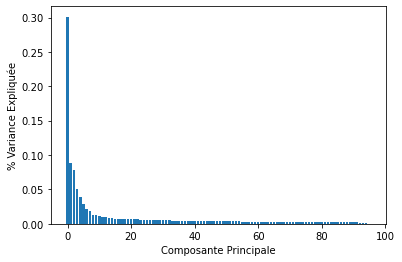

In [39]:
plt.bar(range(pca.n_components_), pca.explained_variance_ratio_)
plt.xlabel('Composante Principale')
plt.ylabel('% Variance Expliquée')
plt.show()



In [40]:

# on crée une instance de l'objet StandardScaler pour centrer et réduire les données
scaler = StandardScaler()
# on transforme les données originales en données centrées et réduites
X_scaled = scaler.fit_transform(dataV8.get_data_matrix())
pca = PCA(n_components=30)
# on applique l'analyse en composantes principales aux données centrées et réduites
X_pca = pca.fit_transform(X_scaled)

variance_cumulee = sum(pca.explained_variance_ratio_)*100
print(variance_cumulee)

79.1716533136809


In [41]:
def plot_pca(X_pca, data2, i, j):
    pc1 = X_pca[:,i-1]
    pc2 = X_pca[:,j-1]

    # appliquer la fonction is_positive() à chaque point et définir la couleur correspondante
    colors = np.array(['red', 'green','blue'])
    y = np.array([data2.is_positive(i) for i in np.arange(len(pc1))])
    colors = colors[y]

    # définir les étiquettes de légende pour chaque couleur
    labels = [('red', 'Sain'), ('green', 'malade'), ('blue', 'autre')]

    # créer une liste de poignées (handles) pour la légende
    handles = [plt.Line2D([], [], marker='o', linestyle='None', color=color, label=label) for color, label in labels]

    # tracer le graphique en deux dimensions avec les coordonnées des échantillons dans les deux premiers PC
    fig, ax = plt.subplots()
    ax.scatter(pc1, pc2, c=colors)
    ax.legend(handles=handles)
    ax.set_xlabel('PC{}'.format(i))
    ax.set_ylabel('PC{}'.format(j))
    plt.show()


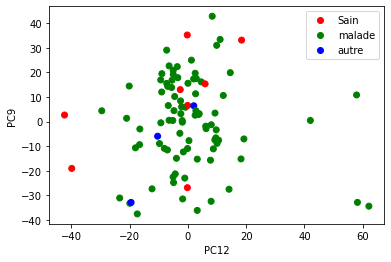

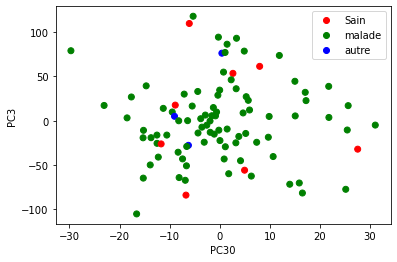

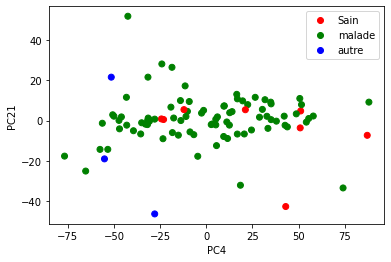

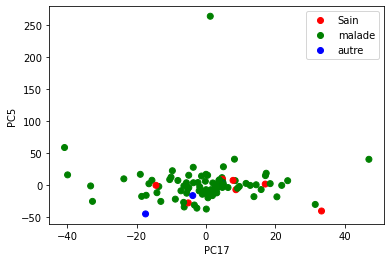

In [42]:
plot_pca(X_pca,dataZ,12,9)
plot_pca(X_pca,dataZ,30,3)
plot_pca(X_pca,dataZ,4,21)
plot_pca(X_pca,dataZ,17,5)

In [43]:
scaler = StandardScaler()
# on transforme les données originales en données centrées et réduites
X_scaled = scaler.fit_transform(dataV9.get_data_matrix())
pca = PCA(n_components=29)
# on applique l'analyse en composantes principales aux données centrées et réduites
X_pca = pca.fit_transform(X_scaled)

variance_cumulee = sum(pca.explained_variance_ratio_)*100
print(variance_cumulee)

79.68218932041417


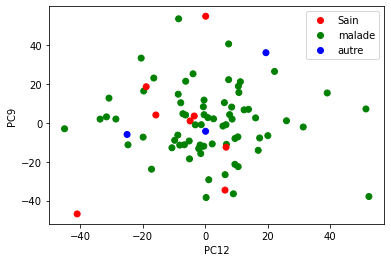

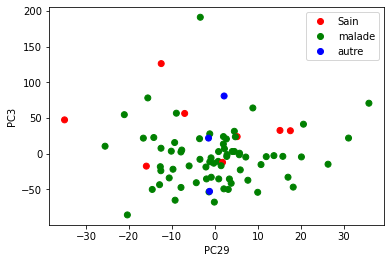

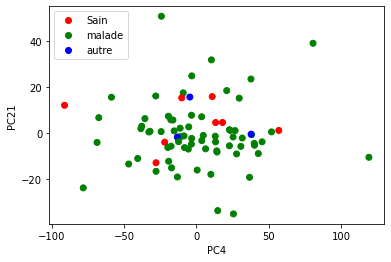

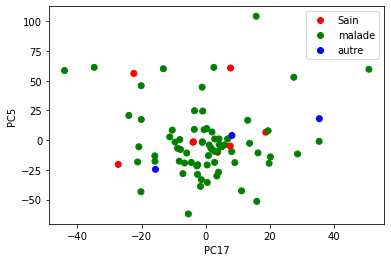

In [44]:
plot_pca(X_pca,dataZ,12,9)
plot_pca(X_pca,dataZ,29,3)
plot_pca(X_pca,dataZ,4,21)
plot_pca(X_pca,dataZ,17,5)

In [45]:
scaler = StandardScaler()
# on transforme les données originales en données centrées et réduites
X_scaled = scaler.fit_transform(dataV5.get_data_matrix())
pca = PCA(n_components=60)
# on applique l'analyse en composantes principales aux données centrées et réduites
X_pca = pca.fit_transform(X_scaled)

variance_cumulee = sum(pca.explained_variance_ratio_)*100
print(variance_cumulee)

81.33393980999463


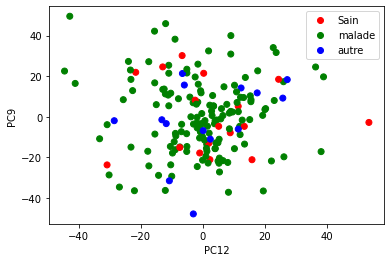

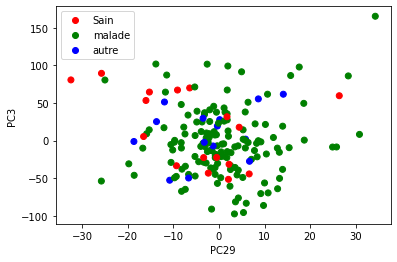

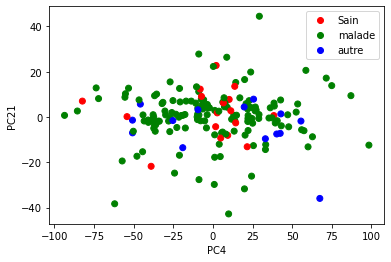

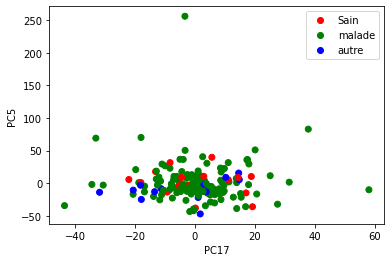

In [46]:
plot_pca(X_pca,dataZ,12,9)
plot_pca(X_pca,dataZ,29,3)
plot_pca(X_pca,dataZ,4,21)
plot_pca(X_pca,dataZ,17,5)

TEST

In [47]:
pc1 = X_pca[:,4]
y = np.array([dataZ.is_positive(i) for i in np.arange(len(pc1))])

In [48]:
#####test################
for i in range (len(pc1)):
    if y[i]!=dataZ.is_positive(i):
        print("!!!!!!!!")

PARTIE 5

In [49]:
als_index = dataZ.get_data_matrix()['sample group'] == "ALS Spectrum MND" 
ctrl_index = dataZ.get_data_matrix()['sample group'] == "Non-Neurological Control"

In [50]:
pvalues = dataV5.get_data_matrix().apply(lambda x: ttest_ind(x[als_index.values], x[ctrl_index.values]).pvalue)

In [51]:
pvalues

A1BG                      0.291018
A1BG-AS1                  0.426198
A1CF                      0.180929
A2M                       0.231381
A2M-AS1                   0.906208
                            ...   
X8_LINE:CR1:LINE          0.797876
X9_LINE:L1:LINE           0.975164
Zaphod2:hAT-Tip100:DNA    0.949136
Zaphod3:hAT-Tip100:DNA    0.713074
Zaphod:hAT-Tip100:DNA     0.710740
Length: 27633, dtype: float64

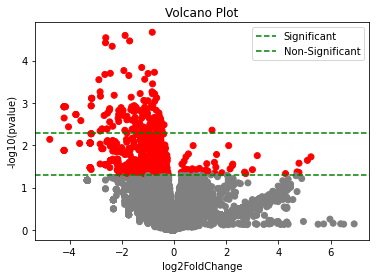

In [133]:
# Définir les axes x et y
epsilon = 0.01 # small constant to avoid division by zero
x = dataV5.get_data_matrix().apply(lambda x: np.log2(x[als_index.values].mean() / (x[ctrl_index.values].mean() + epsilon)))

y = -1 * np.log10(pvalues)

# Définir la couleur et la taille des points
color = np.where(pvalues<0.05, 'red', 'gray')

# Tracer le graphique
plt.scatter(x, y, c=color)
plt.axhline(y=1.3, color='green', linestyle='--')
plt.axhline(y=2.3, color='green', linestyle='--')

# Personnaliser le graphique
plt.xlabel('log2FoldChange')
plt.ylabel('-log10(pvalue)')
plt.title('Volcano Plot')
plt.legend(['Significant', 'Non-Significant'])

# Afficher le graphique
plt.show()

In [60]:
def compute_log10_p_values(p_values):
    log10_p_values = []
    for p in p_values:
        log10_p_values.append(-np.log10(p))
    return log10_p_values



In [61]:
# Liste des indices des p_values ayant un -log10 entre 1.3 et 2.3
indices = []
log10_p_values = compute_log10_p_values(pvalues)
for i, val in enumerate(log10_p_values):
    if 1.3 <= val <= 2.3:
        indices.append(i)
        
print(indices)

[8, 45, 46, 49, 168, 197, 199, 202, 217, 262, 290, 368, 474, 545, 547, 548, 560, 562, 576, 582, 605, 636, 692, 900, 902, 906, 907, 920, 1005, 1030, 1102, 1151, 1209, 1212, 1216, 1317, 1373, 1398, 1432, 1452, 1509, 1584, 1660, 1667, 1668, 1671, 1728, 1757, 1790, 1819, 1838, 1895, 1907, 1949, 1962, 1964, 2141, 2295, 2304, 2372, 2463, 2533, 2734, 2757, 2766, 2804, 2813, 2834, 2839, 2840, 2883, 2976, 2987, 3011, 3072, 3082, 3100, 3236, 3237, 3273, 3344, 3352, 3406, 3442, 3474, 3518, 3590, 3653, 3666, 3704, 3765, 3773, 3842, 3858, 3866, 3943, 4004, 4036, 4229, 4258, 4259, 4279, 4299, 4313, 4326, 4336, 4473, 4519, 4524, 4573, 4753, 4894, 4912, 4918, 5131, 5162, 5226, 5235, 5243, 5360, 5387, 5388, 5391, 5410, 5450, 5467, 5477, 5499, 5524, 5527, 5584, 5586, 5605, 5609, 5681, 5704, 5745, 5837, 5843, 5870, 5892, 5920, 5937, 5960, 5970, 5974, 5984, 5985, 5987, 6022, 6032, 6128, 6156, 6158, 6221, 6228, 6230, 6263, 6270, 6326, 6418, 6427, 6433, 6439, 6450, 6487, 6492, 6519, 6540, 6599, 6611, 6614, 

In [62]:
datab9 = dataV5.get_data_matrix().iloc[:, indices]
datab9


A4GALT  ABCA6  ABCA7  ABCB1  ACOT12  ACSL5  ACSM2A  ACSM4  ACTL10  \
GSM3533382      76    872    750    875       7    291       0      0       0   
GSM3533252      68    696    355    695       3    282       0      0       2   
GSM3533337      12    365    101    215       9     57       0      0       2   
GSM3533314      24    588    154    254       4    108       0      0       1   
GSM3533391      21    537    215    269       2    111       0      0       2   
...            ...    ...    ...    ...     ...    ...     ...    ...     ...   
GSM3533291      14    582    279    205       5     48       0      0       2   
GSM3533349     139    485    299    218       4    227       0      0       4   
GSM3533339      39   1287    135    184       5     80       0      0       2   
GSM3533399      46    556    379    356      10    207       0      0       0   
GSM3533403     135    399    486    571      10    243       0      0       8   

            ADAM15  ...  WDR90  WDR97  XRCC6P5  ZNF114  ZNF295-AS1  ZP1  \
GSM3533382     778  ...    316    138        1      22           2    3   
GSM3533252     465  ...    135     97        1      10           4    0   
GSM3533337     338  ...     58     18        1      43           0    1   
GSM3533314     210  ...     37     18        0      25           3    0   
GSM3533391     264  ...    104     28        1      14           2    1   
...            ...  ...    ...    ...      ...     ...         ...  ...   
GSM3533291     387  ...    145     78        1      24           1    3   
GSM3533349     339  ...    124     56        0      23           4    1   
GSM3533339     348  ...     61     34        1      23           2    0   
GSM3533399     410  ...    157     70        2      10           4    1   
GSM3533403     774  ...    208    135        1      39           1    4   

            GSATII:centr:Satellite  HERV-Fc1_LTR3:ERV1:LTR  L1P4b:L1:LINE  \
GSM3533382                     786                       0            200   
GSM3533252                     315                       0            234   
GSM3533337                     243                       4            117   
GSM3533314                     260                       1            110   
GSM3533391                     411                       0            202   
...                            ...                     ...            ...   
GSM3533291                     496                       0            126   
GSM3533349                     318                       1            185   
GSM3533339                     215                       0             79   
GSM3533399                     302                       0            140   
GSM3533403                     626                       1            164   

            LTR39-int:ERV1:LTR  
GSM3533382                  76  
GSM3533252                  66  
GSM3533337                  36  
GSM3533314                  54  
GSM3533391                  55  
...                        ...  
GSM3533291                  31  
GSM3533349                  46  
GSM3533339                  32  
GSM3533399                  53  
GSM3533403                  42  

[176 rows x 622 columns]

In [63]:
dataV9 = MyDataFrame("Data")
dataV9.set_data_matrix(datab9)


---
## **Partie 6** ##
---

In [387]:
# on normalise nos données
x = scaler.fit_transform(dataV1.get_data_matrix())

# on cree notre ensemble de labels (0 pour les controles, 1 pour les malades)
y = [0] * 176

for i in range(len(y)):
    if dataZ.is_positive(i):
      y[i] = 1
print(y)
print(len(y))


[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]
176


***LOGISTIC REGRESSION AVEC CROSS VALIDATION***

In [388]:
# 1.30 minutes d'execution
elasticNet = LogisticRegressionCV(penalty='elasticnet', cv= 3, solver='saga', l1_ratios=[0.25,0.5,0.75], Cs=[0.1,0.5], scoring= 'accuracy').fit(x, y)

/Users/thomassinapi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/thomassinapi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/thomassinapi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/thomassinapi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/thomassinapi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/thomassi

In [389]:
model_prediction = elasticNet.predict(x)
accuracy_train_dataset = sklearn.metrics.accuracy_score(y, model_prediction)
accuracy_train_dataset

0.9545454545454546

***ON CREE NOTRE DATAFRAME POUR LE DATASET DE TEST***

In [390]:
path = "./Data_test"
pdList = [] 

for fname in glob.glob(path+"/*.txt"):
    df = pd.read_table(fname) 
    sample_name = re.search("GSM\d+", fname).group() 
    df.rename(index= df["gene/TE"], inplace=True) 
    df.drop(columns=df.columns[0], axis=1, inplace=True) 
    df.rename(columns={ df.columns[0]: sample_name }, inplace = True) 
    pdList.append(df) 
datatest_matrix = pd.concat(pdList, 1) 
datatest_matrix = datatest_matrix.transpose()

In [391]:
datatest = MyDataFrame("Data_set")
datatest.set_data_matrix(datatest_matrix)
datatest.get_data_matrix().head()

A1BG  A1BG-AS1  A1CF   A2M  A2M-AS1  A2ML1  A2MP1  A3GALT2  \
GSM3477246    28        76     0  3462       98    141      4        2   
GSM3477226    60       209     0  6811      136    250      1        1   
GSM3477224    82       277     0  7690      187    209      4        6   
GSM3477244    96       224     3  8890      166    269      5        0   
GSM3477220    44       149     1  5266      125    186      2        0   

            A4GALT  A4GNT  AA06  AAAS  AACS  AACSP1  AADAC  AADACL2  \
GSM3477246      15      1    52   244   674      22      0        0   
GSM3477226      54      1    28   504  2423      13      0        0   
GSM3477224      65      1    88   737  2345      26      0        0   
GSM3477244      47      1    76   532  2484      21      0        0   
GSM3477220     138      2    67   382  1121      20      0        0   

            AADACL2-AS1  AADACL3  AADACL4  AADACP1  AADAT  AAED1  AAGAB  \
GSM3477246            0        0        0        0    268     41    763   
GSM3477226            0        0        0        1    395    126   2209   
GSM3477224            4        1        0        1    536     95   1769   
GSM3477244            3        0        0        0    389    110   2146   
GSM3477220            0        0        0        1    313     94   1236   

             AAK1  AAMDC  AAMP  AANAT  AAR2  AARD   AARS  AARS2  AARSD1  \
GSM3477246   7710     38   980      3   250     8   5015    394     169   
GSM3477226  12877    125  2827     11   544   190   8760   1187     381   
GSM3477224  14610    130  2405      5   549    15  11517   1222     433   
GSM3477244  14354    111  2560      8   459    24   7643   1056     386   
GSM3477220  10354     94  1583      3   357     7   6028    724     237   

            AASDH  AASDHPPT  AASS  AATBC  AATF  AATK  ABALON   ABAT  ABCA1  \
GSM3477246    463      1636  1087      1   352  2087       3   5011   1300   
GSM3477226    919      4454  1404      5   819  3678       8  15686   2043   
GSM3477224    790      3127  1695     11  1423  8015       4  12687   2316   
GSM3477244   1275      3947  1726      4   840  3257       5  14805   3203   
GSM3477220    743      2683  1193      1   546  2222       3   8551   1636   

            ABCA10  ABCA11P  ABCA12  ABCA13  ABCA17P  ABCA2  ABCA3  ABCA4  \
GSM3477246     800      260       7       0       42   9498   2677     11   
GSM3477226     884      520     288      60      243  15082   9162     25   
GSM3477224     768      412      19      20      174  34140   7404     57   
GSM3477244    1632      750      30       0      175  15328   7052     72   
GSM3477220     666      297      22       4      127   9445   4010     32   

            ABCA5  ABCA6  ABCA7  ABCA8  ABCA9  ABCA9-AS1  ABCB1  ABCB10  \
GSM3477246   2189    597    256    918    758          4    656     320   
GSM3477226   4742    696    596   1181    867          1    911     548   
GSM3477224   3356    828    705   2164    913          7    968     588   
GSM3477244   6679   1319    586   1588   1574          9   1067     775   
GSM3477220   3382    584    336    974    786          2   1198     490   

            ABCB11  ABCB4  ABCB5  ABCB6  ABCB7  ABCB8  ABCB9  ABCC1  ABCC10  \
GSM3477246       2     14      0    346    295    545    503    457     275   
GSM3477226       5     37      2   1085    700   1248   1098    946     706   
GSM3477224       8     42      0   1160    526   1678   1334   1072     908   
GSM3477244       7     50      0   1145    652   1290   1350   1001     898   
GSM3477220       2     17      0    647    499    851    743    574     436   

            ABCC11  ABCC12  ABCC13  ABCC2  ABCC3  ABCC4  ABCC5  ABCC5-AS1  \
GSM3477246      13      31       0     26     14    295   2129          1   
GSM3477226      72     157       6     22      7    678   4276          0   
GSM3477224      74     123       1     26    101    487   4422          2   
GSM3477244      37     143       1     36     37    645   5199          

In [392]:
# On normalise les données
x_test = scaler.fit_transform(datatest.get_data_matrix())

In [393]:
# LECTURE FICHIER XML TEST
url = '{http://www.ncbi.nlm.nih.gov/geo/info/MINiML}'
tree = ET.parse('Data_test/GSE122649_family.xml')
root = tree.getroot()
#samples = root.findall(url+"Sample")
#print(samples)
data_list = []
for sample in root.findall(url+'Sample'): 
    sample_id = sample.get('iid')
    annotations = {}
    for i in sample.findall(url+'Channel'):
        #print(i)
        for charac in i.findall(url+'Characteristics'):
            if charac.get('tag') in ['tissue', 'subject id', 'diagnosis']:
                annotations[charac.get('tag')] = charac.text.strip()    

    data = {'sample_id': sample_id, **annotations}
    data_list.append(data)
df1 = pd.DataFrame(data_list)  

In [394]:
datatest2 = MyDataFrame2("Data_test")
datatest2.get_data_matrix()
datatest2.set_data_matrix(df1)
datatest2.get_data_matrix()

sample_id        tissue subject id                 diagnosis
0   GSM3477217  motor cortex        JR9                      sALS
1   GSM3477218  motor cortex        JR9                      sALS
2   GSM3477219  motor cortex       JR48                      sALS
3   GSM3477220  motor cortex       JR48                      sALS
4   GSM3477221  motor cortex       JR29                      sALS
5   GSM3477222  motor cortex       JR29                      sALS
6   GSM3477223  motor cortex       JR30                  sALS/FTD
7   GSM3477224  motor cortex       JR30                  sALS/FTD
8   GSM3477225  motor cortex       JR33                      sALS
9   GSM3477226  motor cortex       JR33                      sALS
10  GSM3477227  motor cortex       JR35                      sALS
11  GSM3477228  motor cortex       JR35                      sALS
12  GSM3477229  motor cortex       JR36                      sALS
13  GSM3477230  motor cortex       JR36                      sALS
14  GSM3477231  motor cortex       JR47                  sALS/FTD
15  GSM3477232  motor cortex       JR47                  sALS/FTD
16  GSM3477233  motor cortex       JR60                      sALS
17  GSM3477234  motor cortex       JR60                      sALS
18  GSM3477235  motor cortex       JR34                      sALS
19  GSM3477236  motor cortex       JR34                      sALS
20  GSM3477237  motor cortex       JR61                      sALS
21  GSM3477238  motor cortex       JR61                      sALS
22  GSM3477239  motor cortex       JR18                      sALS
23  GSM3477240  motor cortex       JR18                      sALS
24  GSM3477241  motor cortex       JR27                      sALS
25  GSM3477242  motor cortex       JR27                      sALS
26  GSM3477243  motor cortex       JR39  Non-neurological control
27  GSM3477244  motor cortex       JR39  Non-neurological control
28  GSM3477245  motor cortex       JR44  Non-neurological control
29  GSM3477246  motor cortex       JR44  Non-neurological control
30  GSM3477247  motor cortex       JR67  Non-neurological control
31  GSM3477248  motor cortex       JR67  Non-neurological control
32  GSM3477249  motor cortex       JR65  Non-neurological control
33  GSM3477250  motor cortex       JR65  Non-neurological control
34  GSM3477251  motor cortex       JR70  Non-neurological control
35  GSM3477252  motor cortex       JR70  Non-neurological control
36  GSM3477253  motor cortex       JR73  Non-neurological control
37  GSM3477254  motor cortex       JR73  Non-neurological control

In [395]:
print("x shape:", x.shape)
print("x_test shape:", x_test.shape)

x shape: (176, 28953)
x_test shape: (38, 28952)


***ON REMARQUE UNE DIFFERENCE (DE 1) ENTRE LES 2 DATASETS***
  
*On cherche donc a armoniser nos 2 datasets*

In [396]:
# difference de colonnes entre les 2 dataframes (dataV1 et datatest)
diff1 = datatest.get_data_matrix().columns.difference(dataV1.get_data_matrix().columns)
diff2 = dataV1.get_data_matrix().columns.difference(datatest.get_data_matrix().columns)


In [397]:
d1 = dataV1.get_data_matrix().drop(diff2, axis=1)
dt = datatest.get_data_matrix().drop(diff1, axis=1)
X_train = scaler.fit_transform(d1)
X_test = scaler.fit_transform(dt)
print(X_train.shape)
print(X_test.shape)

(176, 28926)
(38, 28926)


In [398]:
y_train = y

In [399]:
# WARNINGS normal car ne converge pas mais pas de soucis 
elasticNet = LogisticRegressionCV(penalty='elasticnet', cv= 3, solver='saga', l1_ratios=[0.25,0.5,0.75], Cs=[0.1,0.5], scoring= 'accuracy').fit(X_train, y_train)

/Users/thomassinapi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/thomassinapi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/thomassinapi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/thomassinapi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/thomassinapi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/thomassi

In [400]:
# Prédiction sur le jeu de test
model_prediction = elasticNet.predict(X_train)
accuracy_train_dataset = sklearn.metrics.accuracy_score(y_train, model_prediction)

In [401]:
model_prediction

array([0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [402]:
# accuracy sur le jeu d'entrainement (train)
accuracy_train_dataset

0.9545454545454546

In [403]:
prediction_test = elasticNet.predict(X_test)
prediction_test

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0])

In [404]:
y_test = [0] * 38
for i in range(len(y_test)):
    if datatest2.is_positive2(i):
      y_test[i] = 1
print(y_test)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [405]:
accuracy_test_dataset = sklearn.metrics.accuracy_score(y_test, prediction_test)
print("Accuracy du modele sur les données de test : {:.3f}%".format(accuracy_test_dataset * 100))

Accuracy du modele sur les données de test : 65.789%


---

#### ***ON EFFECTUE A NOUVEAU NOS PREDICTIONS SUR LE DATAFRAME DATAV9***

##### *Version avec un nombre de gênes réduit car selectionnés dans la **Partie 5***

In [406]:
x9 = scaler.fit_transform(dataV9.get_data_matrix())
y9 = [0] * 176

for i in range(len(y9)):
    if dataZ.is_positive(i):
      y9[i] = 1
print(y9)
print(len(y9))


[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]
176


In [407]:
elasticNet = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, C=0.5).fit(x9, y9)
model_prediction = elasticNet.predict(x9)
accuracy_train_dataset = sklearn.metrics.accuracy_score(y9, model_prediction)
accuracy_train_dataset

/Users/thomassinapi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


1.0

In [408]:
x_test = scaler.fit_transform(datatest.get_data_matrix())
print("x shape:", x9.shape)
print("x_test shape:", x_test.shape)

x shape: (176, 622)
x_test shape: (38, 28952)


In [409]:
common_columns = datatest.get_data_matrix().columns.intersection(dataV9.get_data_matrix().columns)

# on conserve uniquement les colonnes communes dans les 2 dataframes
common1 = datatest.get_data_matrix()[common_columns]
common2 = dataV9.get_data_matrix()[common_columns]
print(common1.shape)
print(common2.shape)

(38, 620)
(176, 620)


In [410]:
d9 = common2
dt9 = common1
X_train9 = scaler.fit_transform(d9)
X_test9 = scaler.fit_transform(dt9)
X_train9.shape
X_test9.shape

(38, 620)

In [411]:
y_train9 = y9

In [412]:
# WARNINGS normalement pas de soucis
elasticNet = LogisticRegressionCV(penalty='elasticnet', cv= 3, solver='saga', l1_ratios=[0.25,0.1,0.15], Cs=[0.15,0.13,0.1], scoring= 'accuracy').fit(X_train9, y_train9)


/Users/thomassinapi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/thomassinapi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/thomassinapi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/thomassinapi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/thomassinapi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/thomassi

In [413]:
model_prediction = elasticNet.predict(X_train9)
accuracy_train_dataset = sklearn.metrics.accuracy_score(y_train9, model_prediction)
print("Accuracy du modele sur les données d'entrainement :",accuracy_train_dataset*100,'%')

Accuracy du modele sur les données d'entrainement : 100.0 %


***OVERFITTING peut-être ?***

In [414]:
prediction_test = elasticNet.predict(X_test9)

In [415]:
y_test9 = [0] * 38
for i in range(len(y_test9)):
    if datatest2.is_positive2(i):
      y_test9[i] = 1
print(y_test9)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [420]:
accuracy_test_dataset = sklearn.metrics.accuracy_score(y_test9, prediction_test)
print("Accuracy du modele sur le dataTEST avec un entrainement sur le dataV9: {:.3f}%".format(accuracy_test_dataset * 100))

Accuracy du modele sur le dataTEST avec un entrainement sur le dataV9: 71.053%


---
## **Partie 7** ##
---

In [417]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train9, y9) # xtrain is your data matrix, and y is your group labels (ctrl or ALS)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [418]:
# feature importance
importances = model.feature_importances_

feature_names = d9.columns
importance_df = pd.DataFrame({'gene': feature_names, 'importance': importances})

# on trie par ordre décroissant
importance_df = importance_df.sort_values(by='importance', ascending=False)


***AFFICHAGE TOP 100 GENES VIA IMPORTANCE DE XGBOOST***

In [421]:
pd.set_option("display.max_rows", 150)
top100 = importance_df.head(100)
top100['importance'] = top100['importance'].apply(lambda x: x*100)
top100 # en pourcent (%)

<ipython-input-421-95a1532c8b37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top100['importance'] = top100['importance'].apply(lambda x: x*100)


gene  importance
193          GRAP2    7.854035
225         ITGA2B    7.630069
117           EHD2    7.467837
399       MRPL42P5    5.382961
482          PWRN1    4.753330
99          CYP2C9    4.722991
271      LINC01933    4.655235
189        GOLGA8O    4.238101
124          EPHA2    3.742582
15          AKR1D1    3.581379
376        MIR5585    2.948536
236         KLHL17    2.899925
28      ARHGAP27P2    2.500075
81          CHRNA5    2.015625
108          DEFB1    1.897640
207       HEPACAM2    1.859798
608           VRTN    1.775135
387        MIR6818    1.548774
502        S100A10    1.493923
131         ETNPPL    1.474317
333      LRRC3-AS1    1.455981
535          SMAD6    1.395205
190         GPR148    1.191508
354        MIR3146    1.121091
82       CIRBP-AS1    1.114044
411         NAP1L6    1.105756
138    FAM198B-AS1    1.084537
286      LINC02556    1.083994
16           ALAS2    0.982271
250      LINC00664    0.925047
299   LOC101927815    0.856309
391        MIR6866    0.759388
264      LINC01654    0.758096
434          OR2B6    0.737661
538           SMN1    0.724224
585      TNFRSF10A    0.641987
527        SLC2A12    0.578048
97          CT45A7    0.552389
21            ALX3    0.491763
472        POU5F1B    0.486734
300   LOC101927827    0.478771
396           MMP7    0.464097
272      LINC01946    0.439805
112          DOT1L    0.437998
346           MID1    0.434141
241      LEMD1-AS1    0.420460
492          RBPJL    0.416461
4           ACOT12    0.416046
186         GLYCTK    0.407670
469      POM121L8P    0.357815
314   LOC102723704    0.342684
549        SNORD94    0.341214
9           ADAM15    0.339707
40       BBOX1-AS1    0.281220
3            ABCB1    0.252746
1            ABCA6    0.192287
110         DLSTP1    0.184171
31            ARSI    0.182081
52        C13orf42    0.174854
446          P2RY1    0.151382
162           FMO1    0.139723
132           ETV2    0.137788
276      LINC02110    0.127071
269      LINC01847    0.118334
185            GK2    0.118179
381        MIR6514    0.075878
215          ICAM2    0.053336
103          CYYR1    0.025772
440         OR52E2    0.000000
419        NOSTRIN    0.000000
457          PICK1    0.000000
437         OR2T11    0.000000
418           NOS3    0.000000
417          NOBOX    0.000000
438         OR3A4P    0.000000
439         OR52D1    0.000000
458           PIGQ    0.000000
459  PKD1P4-NPIPA8    0.000000
416          NLRX1    0.000000
420         NOTCH3    0.000000
415         NLRP2B    0.000000
414           NID2    0.000000
441          OR8G5    0.000000
413           NFE2    0.000000
442           ORM2    0.000000
443           OTOG    0.000000
444          OTOL1    0.000000
445           OTX1    0.000000
448           P3H4    0.000000
456      PHKA1-AS1    0.000000
421         NOTCH4    0.000000
429        OLFML2A    0.000000
426         NUTM2E    0.000000
451          PCAT7    0.000000
430          OR1E3    0.000000
428           ODF3    0.000000
427           OCM2    0.000000
452         PCDHA2    0.000000
431          OR1Q1    0.000000
453         PDLIM7    0.000000